# Cargue de Datos Árbol de Desición

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ruta = r'C:\Users\jthow\iCloudDrive\Documents\3_Maestria_Estadistica_UNINORTE\3_Tercer_Semestre\Machine_Learning\tornados.csv.zip'  
df = pd.read_csv(ruta) 
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
df['mag'] = df['mag'].fillna(df['mag'].mean())
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

In [ ]:
pip install mglearn

In [9]:
# Crear la columna 'mortality' en el DataFrame original
df['mortality'] = df['fat'].apply(lambda x: 0 if x == 0 else 1)

# Renombrar el DataFrame a 'mortality_target'
mortality_target = df
import numpy as np

# Crear la columna 'mortality' con 0 si 'fat' es 0, y 1 si 'fat' es mayor que 0
df['mortality'] = np.where(df['fat'] == 0, 0, 1)

# Contar la cantidad de ceros y unos
print("Cantidad de ceros:", (df['mortality'] == 0).sum())
print("Cantidad de unos:", (df['mortality'] == 1).sum())

# Asignar el DataFrame modificado a 'tornados.target'
tornados_target = df

Cantidad de ceros: 67120
Cantidad de unos: 1573


In [10]:
from sklearn.model_selection import train_test_split
X = tornados_target[['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4']]
y = df['mortality']
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Poda del árbol de decisión (Tree Pruning): 

In [12]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Validación cruzada (Cross-validation):

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: {:.3f}".format(scores.mean()))


Cross-validation scores:  [1. 1. 1. 1. 1.]
Average cross-validation score: 1.000


Ajuste de hiperparámetros: 

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.000


1. Datos muy fáciles de predecir
Si el conjunto de datos es muy sencillo o tiene patrones muy claros y consistentes, el modelo puede aprender perfectamente sin generalizar, lo que lleva a una puntuación perfecta. En este caso, el modelo no estaría aprendiendo nada nuevo o útil, ya que las decisiones ya están predeterminadas.
(Data Leakage):
La fuga de datos ocurre cuando el modelo tiene acceso a información en el conjunto de entrenamiento que normalmente no tendría en el mundo real. Esto puede hacer que el modelo se ajuste de manera excesiva a los datos de entrenamiento.

# Análisis de los árboles de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
from sklearn.tree import export_graphviz

# Exportar el árbol de decisión a un archivo .dot
export_graphviz(tree,
                out_file="tree.dot",  # Nombre del archivo de salida
                class_names=["NO VICTIMAS", "VICTIMAS"],  # Cambiar a los nombres de las clases de tu variable objetivo 'y'
                feature_names=X.columns.tolist(),  # Usar las columnas de X como nombres de características
                impurity=False,  # No mostrar la impureza de cada nodo
                filled=True)  # Colorear los nodos según la clase

In [ ]:
pip install graphviz

In [18]:
import graphviz

In [19]:
with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)

In [ ]:
pip install pygraphviz

In [21]:
import graphviz

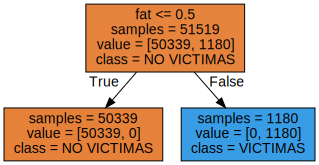

In [17]:
graphviz.Source(dot_graph)

In [ ]:
pip install lime

In [25]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
import matplotlib.pyplot as plt
import numpy as np

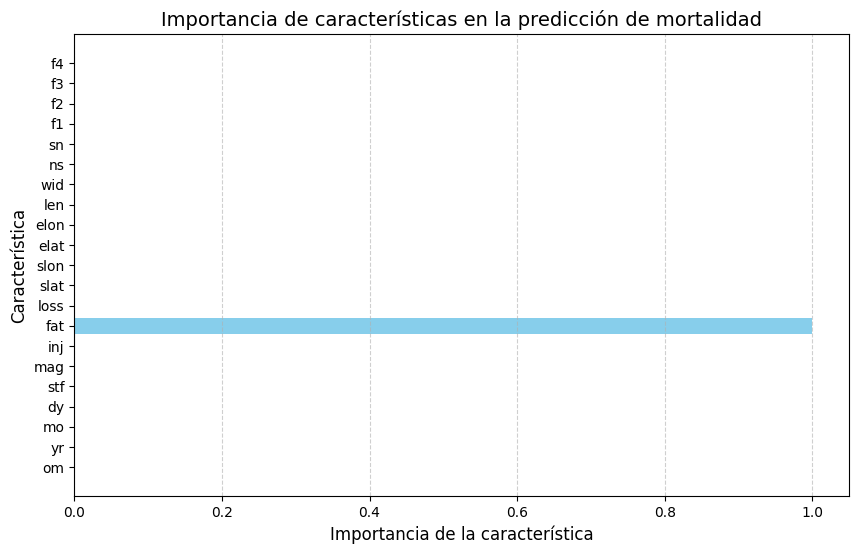

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_tornados(model, feature_names):
    """
    Visualiza la importancia de las características para un modelo entrenado.
    
    Parámetros:
    -----------
    model : modelo entrenado (ej: DecisionTreeClassifier, RandomForest)
    feature_names : list
        Nombres de las características usadas en el modelo.
    """
    n_features = len(feature_names)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='skyblue')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Importancia de la característica", fontsize=12)
    plt.ylabel("Característica", fontsize=12)
    plt.title("Importancia de características en la predicción de mortalidad", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Uso de la función con tu modelo y datos:
feature_names = ['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 
                 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 
                 'f1', 'f2', 'f3', 'f4']  # Asegúrate de que coincida con X_train.columns

plot_feature_importances_tornados(tree, feature_names)

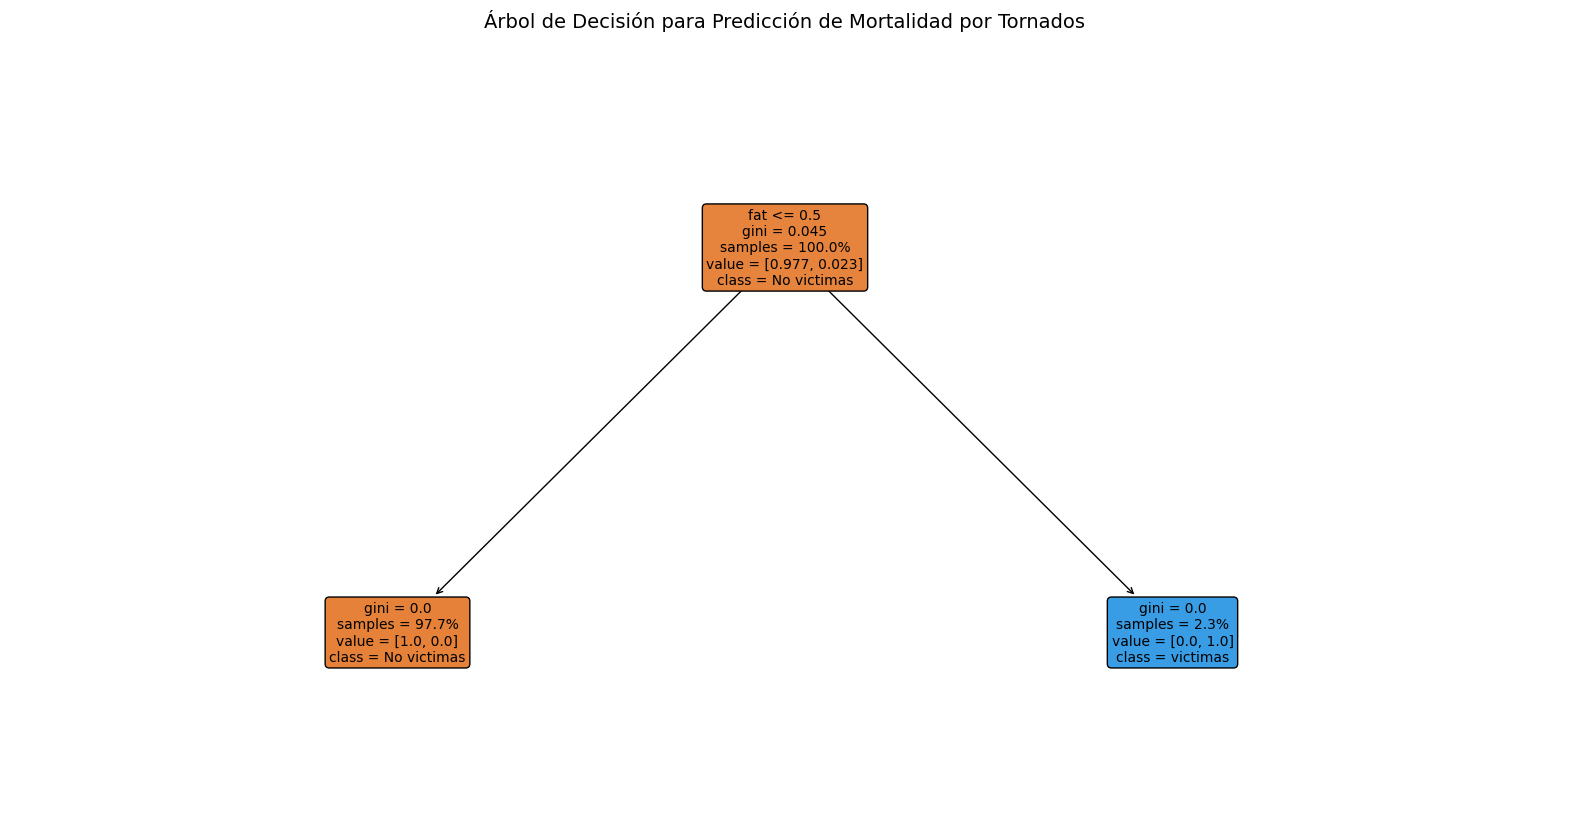

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# 1. Entrenar un árbol de decisión (como ya lo tienes)
tree = DecisionTreeClassifier(max_depth=6, random_state=42)  # Limitar profundidad para visualización
tree.fit(X_train, y_train)

# 2. Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X_train.columns.tolist(),  # Nombres de tus características
          class_names=['No victimas', 'victimas'],  # Nombres de tus clases
          filled=True, 
          rounded=True, 
          proportion=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción de Mortalidad por Tornados", pad=20, fontsize=14)
plt.show()

In [ ]:
pip install mglearn

Columnas disponibles: ['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'datetime_utc', 'st', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4', 'fc']


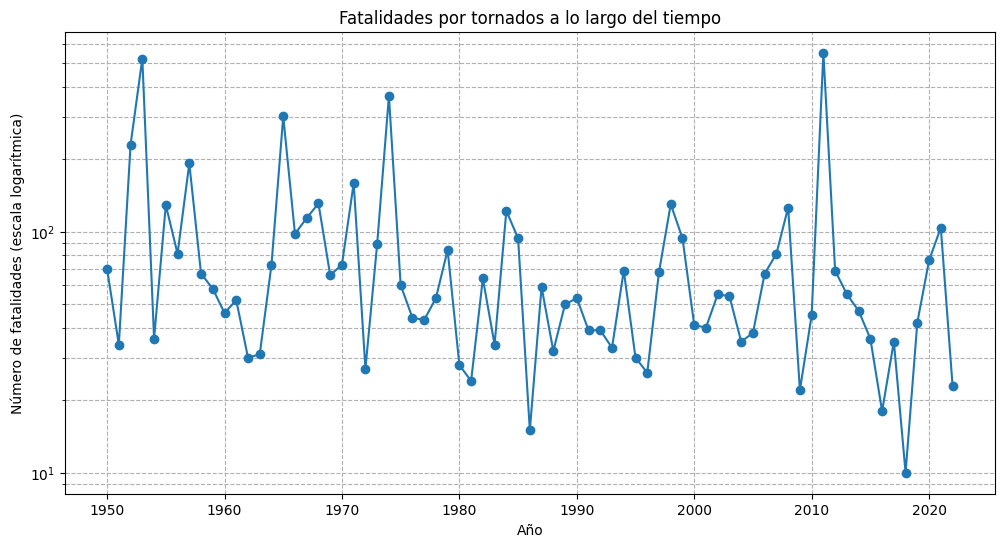

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar los datos
ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta)

# 2. Verificar las columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# 3. Convertir la columna de fechas a datetime (si existe)
# Asumo que tienes una columna 'datetime_utc' o similar
if 'datetime_utc' in df.columns:
    df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
    df['year'] = df['datetime_utc'].dt.year  # Extraer año si necesitas agrupar por año

# 4. Gráfico de fatalidades a lo largo del tiempo (versión corregida)
plt.figure(figsize=(12, 6))

# Opción 1: Si tienes columnas 'year' y 'fat' (fatalidades)
if 'year' in df.columns and 'fat' in df.columns:
    # Agrupar fatalidades por año
    fatalidades_por_año = df.groupby('year')['fat'].sum()
    
    plt.semilogy(fatalidades_por_año.index, fatalidades_por_año.values, 'o-')
    plt.xlabel("Año")
    plt.ylabel("Número de fatalidades (escala logarítmica)")
    plt.title("Fatalidades por tornados a lo largo del tiempo")
    plt.grid(True, which="both", ls="--")

# Opción 2: Si tienes fechas exactas
elif 'datetime_utc' in df.columns and 'fat' in df.columns:
    plt.semilogy(df['datetime_utc'], df['fat'], 'o', alpha=0.5)
    plt.xlabel("Fecha")
    plt.ylabel("Número de fatalidades (escala logarítmica)")
    plt.title("Fatalidades por tornados a lo largo del tiempo")
    plt.grid(True, which="both", ls="--")

else:
    print("No se encontraron las columnas necesarias ('datetime_utc' o 'fat')")

plt.show()

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [45]:
import pandas as pd

# Asumiendo que tu DataFrame se llama df y tiene una columna de fecha llamada 'date'
# Si tu columna tiene otro nombre (ej: 'datetime_utc'), cámbialo en el código

# 1. Convertir la columna de fecha a tipo datetime (si no lo está)
df['date'] = pd.to_datetime(df['date'])  # Cambia 'date' por tu columna real

# 2. Definir el año de corte (ej: entrenar con datos antes del 2010 y test después)
corte_year = 2010

# 3. Dividir los datos
train = df[df['date'].dt.year < corte_year]
test = df[df['date'].dt.year >= corte_year]

# 4. Verificación
print(f"Entrenamiento: {train.shape[0]} registros ({train['date'].min().year}-{train['date'].max().year})")
print(f"Prueba: {test.shape[0]} registros ({test['date'].min().year}-{test['date'].max().year})")

Entrenamiento: 53228 registros (1950-2009)
Prueba: 15465 registros (2010-2022)


In [46]:
# Dividir considerando fatalidades ('fat')
corte_year = 2010
train = df[df['date'].dt.year < corte_year]
test = df[df['date'].dt.year >= corte_year]

# Análisis comparativo
print("\nFatalidades promedio:")
print(f"Entrenamiento: {train['fat'].mean():.2f} por tornado")
print(f"Prueba: {test['fat'].mean():.2f} por tornado")


Fatalidades promedio:
Entrenamiento: 0.09 por tornado
Prueba: 0.07 por tornado


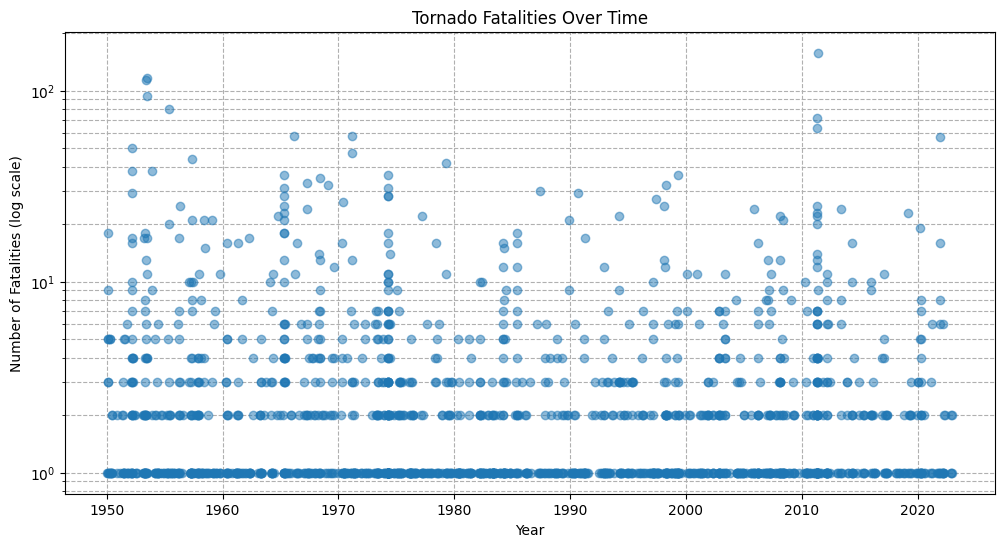

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your tornado data
tornado_data = pd.read_csv('tornados.csv')

# 2. Convert date column to datetime
tornado_data['date'] = pd.to_datetime(tornado_data['date'])

# 3. Verify and clean numerical columns (like fatalities)
# Convert string numbers to numeric, coercing errors to NaN
tornado_data['fat'] = pd.to_numeric(tornado_data['fat'], errors='coerce')

# 4. Handle zeros/negative values before log transform
# Add small constant to avoid log(0)
tornado_data['log_fat'] = np.log(tornado_data['fat'] + 1e-6)  # 1e-6 avoids log(0)

# 5. Now create the semi-log plot correctly
plt.figure(figsize=(12, 6))
plt.semilogy(tornado_data['date'], tornado_data['fat'], 'o', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Fatalities (log scale)")
plt.title("Tornado Fatalities Over Time")
plt.grid(True, which="both", ls="--")
plt.show()

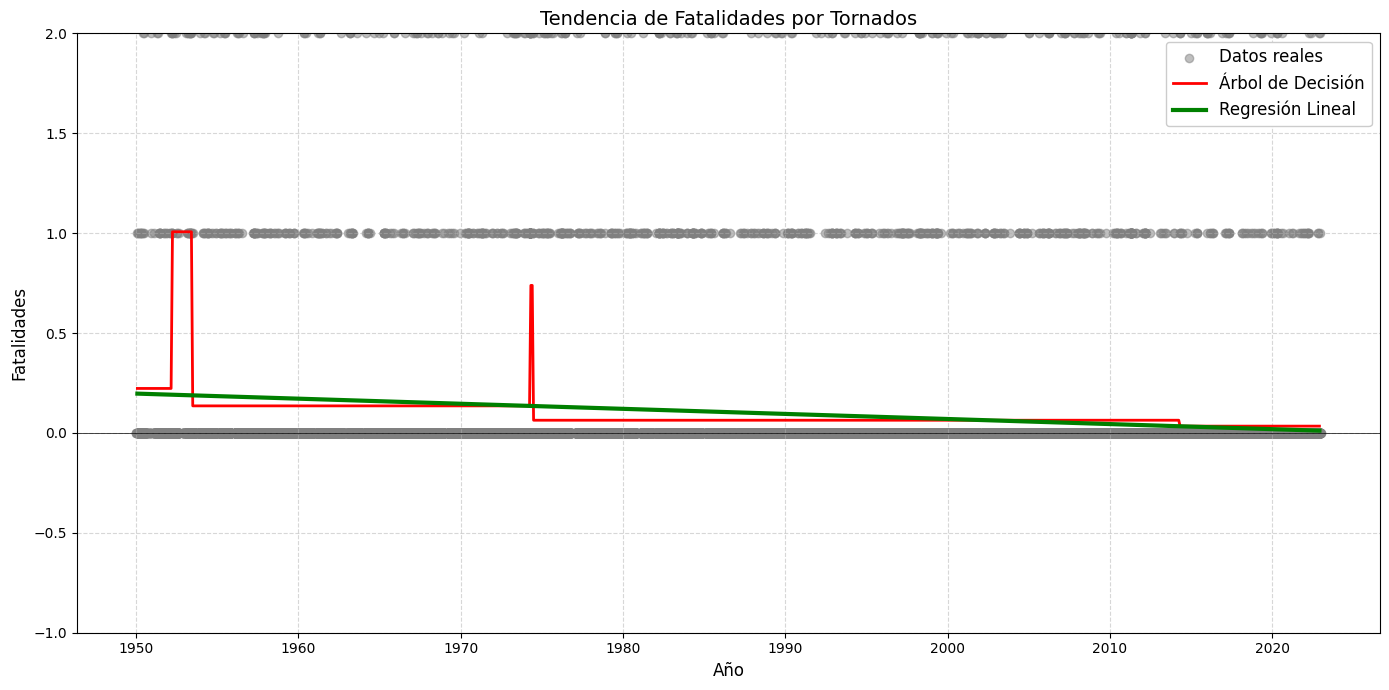

In [56]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar y preparar datos
df = pd.read_csv('tornados.csv')
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Variables para el modelo
X = df[['days_since_start']]
y = df['fat'].fillna(0)  # Asumiendo que 'fat' son fatalidades

# Entrenar modelos
tree = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y)
linear = LinearRegression().fit(X, y)

# Crear rango de predicción
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='M')
X_pred = pd.DataFrame({'days_since_start': [(d - df['date'].min()).days for d in date_range]})

# Predicciones
df_pred = pd.DataFrame({
    'date': date_range,
    'tree_pred': tree.predict(X_pred),
    'linear_pred': linear.predict(X_pred)
})

# Configuración del gráfico con tus requisitos
plt.figure(figsize=(14, 7))

# 1. Datos reales
plt.scatter(df['date'], y, alpha=0.5, label='Datos reales', color='gray')

# 2. Línea de Árbol de Decisión (roja)
plt.plot(df_pred['date'], df_pred['tree_pred'], 'r-', lw=2, label='Árbol de Decisión')

# 3. Línea de Regresión Lineal (verde)
plt.plot(df_pred['date'], df_pred['linear_pred'], 'g-', lw=3, label='Regresión Lineal')  # Verde sólido

# Configuración de ejes
plt.ylim(-1, 2)  # Rango del eje Y fijo de -5 a 10
plt.xlabel('Año', fontsize=12)
plt.ylabel('Fatalidades', fontsize=12)
plt.title('Tendencia de Fatalidades por Tornados', fontsize=14)

# Elementos adicionales
plt.legend(fontsize=12, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Línea en y=0

# Ajustar márgenes
plt.tight_layout()
plt.show()

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta) 
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
df['mag'] = df['mag'].fillna(df['mag'].mean())
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

In [62]:
# Crear la columna 'mortality' en el DataFrame original
df['mortality'] = df['fat'].apply(lambda x: 0 if x == 0 else 1)

# Renombrar el DataFrame a 'mortality_target'
mortality_target = df
import numpy as np

# Crear la columna 'mortality' con 0 si 'fat' es 0, y 1 si 'fat' es mayor que 0
df['mortality'] = np.where(df['fat'] == 0, 0, 1)

# Contar la cantidad de ceros y unos
print("Cantidad de ceros:", (df['mortality'] == 0).sum())
print("Cantidad de unos:", (df['mortality'] == 1).sum())

# Asignar el DataFrame modificado a 'tornados.target'
tornados_target = df

Cantidad de ceros: 67120
Cantidad de unos: 1573


In [64]:
from sklearn.model_selection import train_test_split
X = tornados_target[['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4']]
y = df['mortality']
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [ ]:
pip install mglearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def visualize_forest(forest, X_train, y_train, feature_names=None):
    """Visualización garantizada de Random Forest para datos de tornados"""
    # 1. Verificación básica de inputs
    if not hasattr(forest, 'estimators_'):
        raise ValueError("El modelo proporcionado no es un Random Forest con árboles accesibles")
    
    # 2. Preparación de datos
    X = X_train.values if hasattr(X_train, 'values') else np.array(X_train)
    y = y_train.values if hasattr(y_train, 'values') else np.array(y_train)
    
    # 3. Selección automática de 2 características importantes
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]
    
    if X.shape[1] < 2:
        raise ValueError("Se necesitan al menos 2 características para la visualización")
    
    # Seleccionar las 2 características más importantes
    if hasattr(forest, 'feature_importances_'):
        top_features = np.argsort(forest.feature_importances_)[-2:]
    else:
        top_features = [0, 1]  # Por defecto
    
    X_2d = X[:, top_features]
    selected_features = [feature_names[i] for i in top_features]

    # 4. Configuración de la figura
    plt.figure(figsize=(15, 8))
    
    # 5. Visualización del Random Forest completo
    try:
        from mlxtend.plotting import plot_decision_regions
        plot_decision_regions(X_2d, y, clf=forest, legend=2)
        plt.xlabel(selected_features[0])
        plt.ylabel(selected_features[1])
        plt.title("Fronteras de Decisión del Random Forest")
    except ImportError:
        # Fallback si no tienes mlxtend instalado
        plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6)
        plt.xlabel(selected_features[0])
        plt.ylabel(selected_features[1])
        plt.title("Distribución de Clases (sin fronteras de decisión)")
    
    plt.show()
    
    # 6. Visualización de los primeros 4 árboles
    n_trees = min(4, len(forest.estimators_))
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, ax in enumerate(axes.ravel()[:n_trees]):
        from sklearn.tree import plot_tree
        plot_tree(forest.estimators_[i], 
                 feature_names=feature_names,
                 class_names=['No VICTIMAS', 'VICTIMAS'],
                 filled=True, 
                 ax=ax)
        ax.set_title(f"Árbol {i+1}")
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# visualize_forest(forest_model, X_train, y_train, feature_names=['mag', 'fat', 'len', 'wid'])

In [82]:
print("Dimensiones de X_train:", X_train.shape)
print("Clases en y_train:", np.unique(y_train))

Dimensiones de X_train: (51519, 21)
Clases en y_train: [0 1]


In [ ]:
pip install mlxtend scikit-learn matplotlib numpy

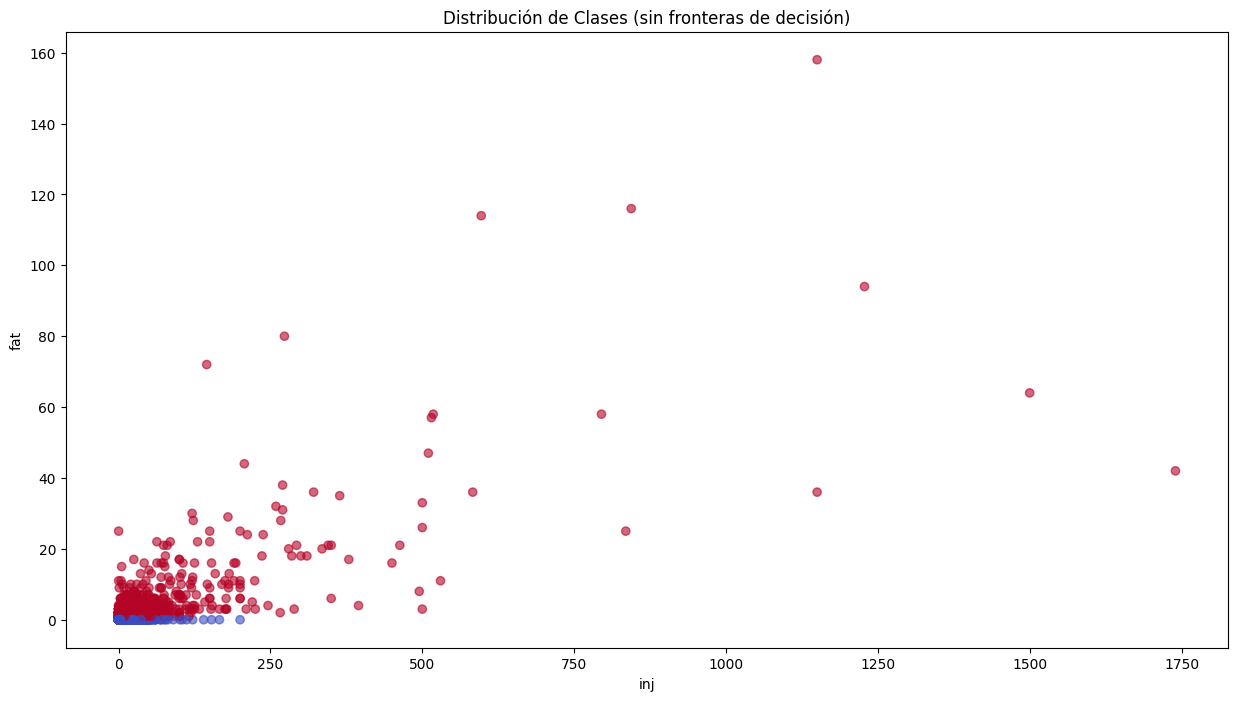

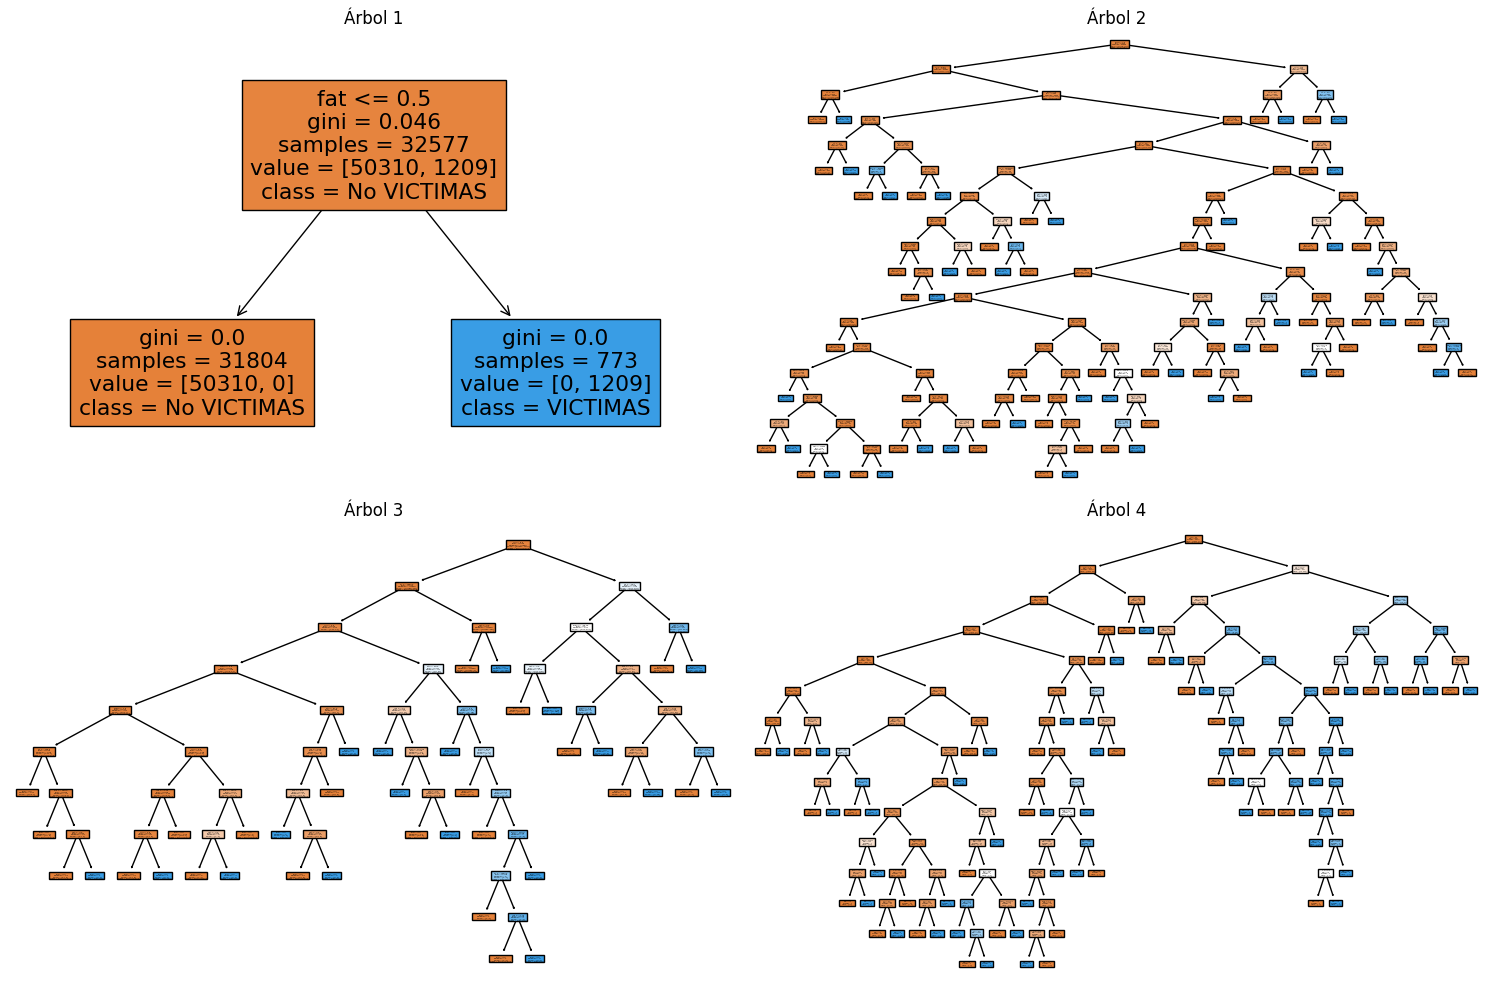

In [84]:
# Asumiendo que tienes:
# forest = RandomForestClassifier().fit(X_train, y_train)
visualize_forest(forest, X_train, y_train, feature_names=['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 
                 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 
                 'f1', 'f2', 'f3', 'f4'])

# XGBoost_Método de Boosting

In [ ]:
pip install xgboost

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

# Asumiendo que ya tienes X y y preparados como en tu código anterior
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Crear el modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=0)

# Ajustar el modelo con los datos de entrenamiento
xgboost_model.fit(X_train, y_train)

# Evaluar la precisión en el conjunto de entrenamiento y prueba
print("Accuracy on training set: {:.3f}".format(xgboost_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgboost_model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y prueba (asegurando que X y y ya están definidos)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Parámetros a comparar
params = [
    {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0},
    {'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 0},
    {'max_depth': 5, 'n_estimators': 100, 'random_state': 0},
    {'subsample': 0.8, 'n_estimators': 100, 'random_state': 0},
    {'colsample_bytree': 0.8, 'n_estimators': 100, 'random_state': 0}
]

# Lista para almacenar resultados
results = []

# Probar cada conjunto de parámetros
for param in params:
    xgboost_model = xgb.XGBClassifier(**param)
    xgboost_model.fit(X_train, y_train)
    y_pred = xgboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((param, accuracy))

# Mostrar los resultados
for param, accuracy in results:
    print(f"Parameters: {param} -> Accuracy: {accuracy:.4f}")

Parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0} -> Accuracy: 1.0000
Parameters: {'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 0} -> Accuracy: 1.0000
Parameters: {'max_depth': 5, 'n_estimators': 100, 'random_state': 0} -> Accuracy: 1.0000
Parameters: {'subsample': 0.8, 'n_estimators': 100, 'random_state': 0} -> Accuracy: 1.0000
Parameters: {'colsample_bytree': 0.8, 'n_estimators': 100, 'random_state': 0} -> Accuracy: 1.0000


In [ ]:
pip install --upgrade xgboost

In [16]:
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=3,  # Número de divisiones en validación cruzada
                           verbose=1)

In [ ]:
pip install --upgrade scikit-learn

In [18]:
# Definir el modelo XGBoost sin GridSearchCV
xgboost_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)

# Ajustar el modelo con los datos de entrenamiento
xgboost_model.fit(X_train, y_train)

# Evaluar la precisión en el conjunto de entrenamiento y prueba
print("Accuracy on training set: {:.3f}".format(xgboost_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgboost_model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


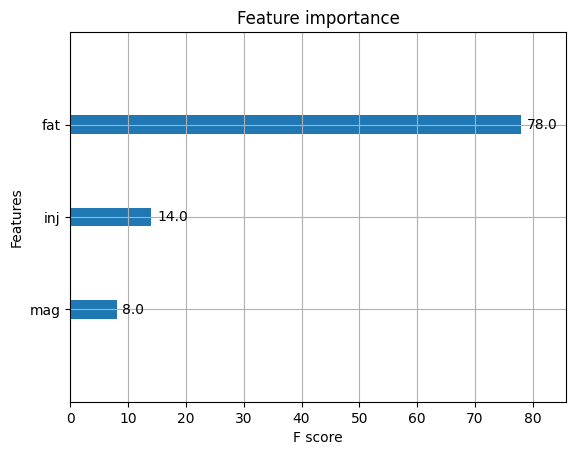

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Visualizar la importancia de las características
plot_importance(xgboost_model)
plt.show()

In [20]:
# Predicciones en el conjunto de test
y_pred = xgboost_model.predict(X_test)

# Calcular la precisión (accuracy)
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred)))

Accuracy on test set: 1.000


In [21]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 100
}

# Realizar validación cruzada
cv_results = xgb.cv(params=params, dtrain=xgb.DMatrix(X_train, label=y_train),
                    num_boost_round=100, early_stopping_rounds=10, nfold=3, verbose_eval=True)

# Ver resultados de la validación cruzada
print(cv_results)

[0]	train-logloss:0.16752+0.00041	test-logloss:0.16752+0.00057
[1]	train-logloss:0.15576+0.00037	test-logloss:0.15576+0.00048
[2]	train-logloss:0.14560+0.00033	test-logloss:0.14560+0.00042
[3]	train-logloss:0.13655+0.00030	test-logloss:0.13656+0.00037
[4]	train-logloss:0.12836+0.00027	test-logloss:0.12836+0.00033
[5]	train-logloss:0.12086+0.00025	test-logloss:0.12086+0.00030
[6]	train-logloss:0.11395+0.00023	test-logloss:0.11395+0.00027
[7]	train-logloss:0.10754+0.00022	test-logloss:0.10754+0.00024
[8]	train-logloss:0.10158+0.00020	test-logloss:0.10158+0.00022
[9]	train-logloss:0.09601+0.00019	test-logloss:0.09601+0.00020
[10]	train-logloss:0.09081+0.00017	test-logloss:0.09081+0.00019
[11]	train-logloss:0.08593+0.00016	test-logloss:0.08593+0.00017
[12]	train-logloss:0.08134+0.00015	test-logloss:0.08135+0.00016
[13]	train-logloss:0.07704+0.00014	test-logloss:0.07704+0.00015
[14]	train-logloss:0.07298+0.00013	test-logloss:0.07298+0.00014
[15]	train-logloss:0.06916+0.00013	test-logloss:0.

# Gradiente Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [87]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [88]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


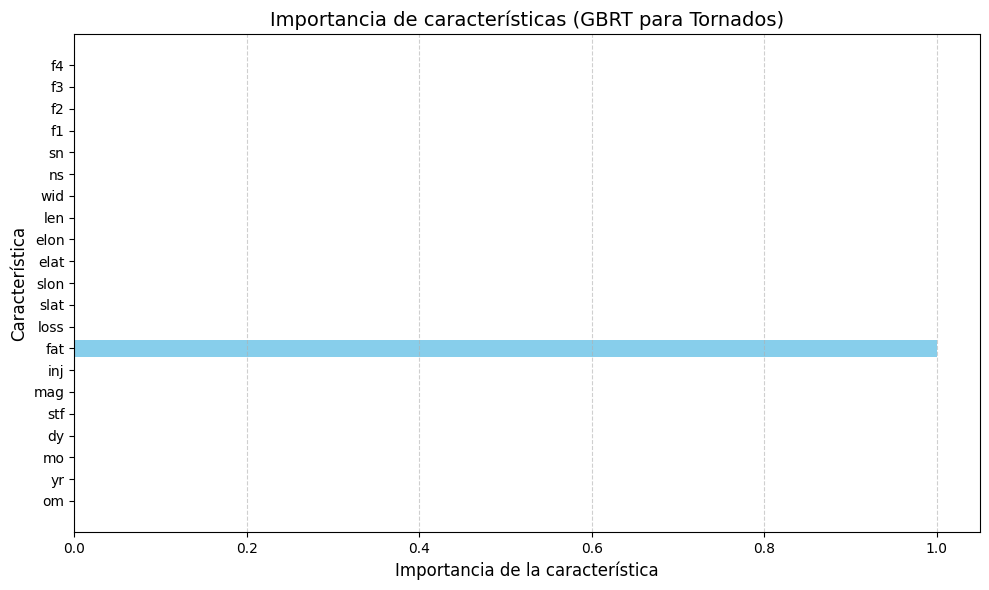

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# 1. Definir la función de visualización con todos los parámetros necesarios
def plot_feature_importances_tornados(model, feature_names, title="Importancia de características"):
    """
    Visualiza la importancia de las características para un modelo entrenado
    
    Parámetros:
    model: Modelo entrenado (debe tener feature_importances_)
    feature_names: Lista de nombres de características
    title: Título del gráfico (opcional)
    """
    n_features = len(feature_names)
    importances = model.feature_importances_
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features), importances, align='center', color='skyblue')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Importancia de la característica", fontsize=12)
    plt.ylabel("Característica", fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 2. Entrenar el modelo GBRT
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

# 3. Obtener los nombres de las características
# Asumiendo que X_train es un DataFrame de pandas:
feature_names = X_train.columns.tolist()

# 4. Visualizar la importancia de características
plot_feature_importances_tornados(gbrt, feature_names, 
                                title="Importancia de características (GBRT para Tornados)")

In [97]:
import lime
import lime.lime_tabular
import numpy as np

# Versión corregida del explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Asegurar que es numpy array
    feature_names=X_train.columns.tolist(),  # Nombres de características
    class_names=['No victimas ', 'victimas'],  # Nombres de clases (ajustar según tus datos)
    mode='classification',
    discretize_continuous=True,  # Mejor para variables numéricas
    random_state=42  # Para reproducibilidad
)

In [105]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar datos de ejemplo (iris)
X = tornados_target[['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4']]
y = df['mortality']
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 1. Crear y entrenar el modelo
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# 2. Predecir la instancia 100 (si existe)
try:
    # Intenta acceso como DataFrame
    instance = X_test.iloc[100:101].values
except AttributeError:
    try:
        # Si falla, intenta como array NumPy
        instance = X_test[100].reshape(1, -1)
    except IndexError:
        print(f"Error: X_test solo tiene {len(X_test)} muestras")
        exit()

prediccion = modelo.predict(instance)
print("Predicción:", prediccion)

Predicción: [0]


In [106]:
# 1. Selección segura de la instancia
try:
    instance = X_test.iloc[100:101] if hasattr(X_test, 'iloc') else X_test[100].reshape(1, -1)
except IndexError:
    print(f"¡Error! X_test solo tiene {len(X_test)} muestras.")
    exit()

# 2. Predicción y probabilidades (si el modelo lo soporta)
prediccion = modelo.predict(instance)
probabilidades = modelo.predict_proba(instance) if hasattr(modelo, 'predict_proba') else None

# 3. Resultado detallado
print("\n--- Resultado de Predicción ---")
print(f"Clase predicha: {prediccion[0]}")
if probabilidades is not None:
    print(f"Probabilidades por clase: {probabilidades[0].round(3)}")

# 4. Visualización (para datos tabulares)
if hasattr(instance, 'columns'):
    display(instance.style.highlight_max(axis=1))


--- Resultado de Predicción ---
Clase predicha: 0
Probabilidades por clase: [1. 0.]


,om,yr,mo,dy,stf,mag,inj,fat,loss,slat,slon,elat,elon,len,wid,ns,sn,f1,f2,f3,f4
9706,200,1967,4,21,17,1.000000,0,0,5000.000000,40.100000,-88.300000,0.000000,0.000000,0.100000,10,1,1,19,0,0,0
